In [1]:
import numpy as np
import numba as jit
import networkx as nx
from itertools import permutations
import matplotlib.pyplot as plt

{(0, 1): Text(63.0660321633373, 38.477791594900665, '78'),
 (0, 2): Text(63.491382778466814, 12.277429744512458, '34'),
 (0, 3): Text(48.469175401318495, 39.06413307791801, '93'),
 (0, 4): Text(47.02157399146407, 5.454588176670589, '60'),
 (0, 5): Text(72.83402308172717, 48.7072647777169, '93'),
 (1, 2): Text(49.42535061512952, 48.68002640347298, '52'),
 (1, 3): Text(34.4031432379812, 75.46672973687853, '29'),
 (1, 4): Text(32.95554182812677, 41.8571848356311, '73'),
 (1, 5): Text(58.76799091838986, 85.10986143667742, '28'),
 (2, 3): Text(34.82849385311072, 49.266367886490315, '61'),
 (2, 4): Text(33.38089244325629, 15.656822985242897, '35'),
 (2, 5): Text(59.19334153351939, 58.909499586289215, '75'),
 (3, 4): Text(18.358685066107974, 42.44352631864845, '67'),
 (3, 5): Text(44.17113415637106, 85.69620291969477, '52'),
 (4, 5): Text(42.72353274651664, 52.08665801844734, '100')}

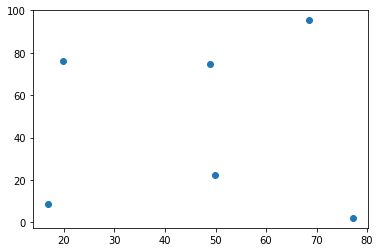

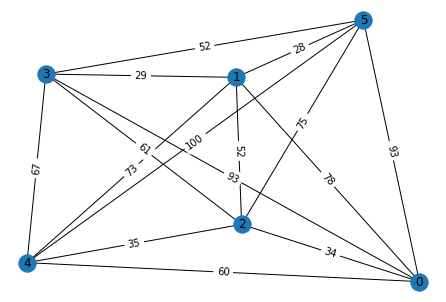

In [2]:
from lib.tsp import *
NB_CITIES=6
seed=10
np.random.seed(seed)
cities, distances = init_tsp(NB_CITIES)
cities[1][0]= 49
distances = compute_distances(cities)
plot_cities(cities)

plt.figure()
G=nx.Graph()
G.add_nodes_from(range(NB_CITIES))
for i in np.arange(NB_CITIES):
    for j in np.arange(i, NB_CITIES):
        if distances[i][j] > 0:
            G.add_edge(i, j, r = int(distances[i][j]))
edge_labels = nx.get_edge_attributes(G, 'r')
nx.draw(G, cities)
nx.draw_networkx_labels(G, cities)
nx.draw_networkx_edge_labels(G, cities, edge_labels=edge_labels)



In [3]:
plt.savefig('graph%d-%d.pdf'% (NB_CITIES, seed))

[[77.13206433  2.07519494]
 [63.36482349 74.88038825]
 [49.85070123 22.47966455]
 [19.80628648 76.05307122]
 [16.91108366  8.83398142]
 [68.53598184 95.33933462]]


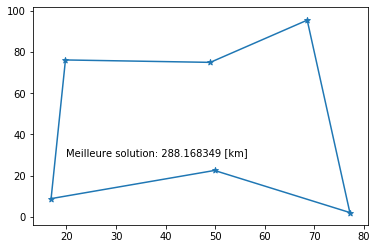

In [4]:
arr = np.asarray(list(permutations(np.arange(NB_CITIES))))
fitnesses = np.apply_along_axis(fitness, 1, arr, distance=distances)
best = np.argmin(fitnesses)
plot_solution(arr[best].astype(int), cities)
plt.text(20, 30, "Meilleure solution: %f [km]"%fitnesses[best])
plt.savefig('graph6-10-sol.pdf')

"plt.figure()\nG=nx.Graph()\nG.add_nodes_from(range(NB_CITIES))\nfor i in np.arange(NB_CITIES):\n    for j in np.arange(i, NB_CITIES):\n        if distances[i][j] > 0:\n            G.add_edge(i, j, r = int(distances[i][j]))\nedge_labels = nx.get_edge_attributes(G, 'r')\nnx.draw(G, cities)\nnx.draw_networkx_labels(G, cities)\nnx.draw_networkx_edge_labels(G, cities, edge_labels=edge_labels)\n"

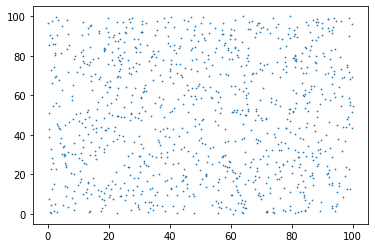

In [6]:
NB_CITIES=1000
seed=10
np.random.seed(seed)
cities, distances = init_tsp(NB_CITIES)
plot_cities(cities, marker='.', s=2)

"""plt.figure()
G=nx.Graph()
G.add_nodes_from(range(NB_CITIES))
for i in np.arange(NB_CITIES):
    for j in np.arange(i, NB_CITIES):
        if distances[i][j] > 0:
            G.add_edge(i, j, r = int(distances[i][j]))
edge_labels = nx.get_edge_attributes(G, 'r')
nx.draw(G, cities)
nx.draw_networkx_labels(G, cities)
nx.draw_networkx_edge_labels(G, cities, edge_labels=edge_labels)
"""